# The project is predicting sale price of the house based on the characteristics of the house. The algorithm to predict is linear regression

In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.simplefilter('ignore')
plt.style.use('seaborn-whitegrid')

In [5]:
Data= pd.read_csv('Raw_Housing_Prices.csv')

# Eyeballing the data

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

In [7]:
#Just a quick observation through the data
#Target variable is Sale Price
Data['Sale Price'].head(10)
Data['Sale Price'].tail(10)

21603     507250.0
21604     429000.0
21605     610685.0
21606    1010000.0
21607     475000.0
21608     360000.0
21609     400000.0
21610     402101.0
21611     400000.0
21612     325000.0
Name: Sale Price, dtype: float64

In [8]:
#Statistic values of target value
#Loosing 4 values of the sale price 
#Distribution of data is not normal, as 50% of data located below the mean value so the
#____data is right skewed type disribution

Data['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

# Treat of the outliers and missing values

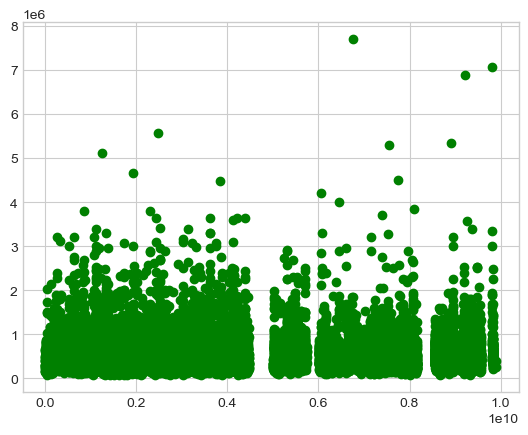

In [9]:
#Just to look at the data and some points that are out of the normal range

plt.scatter(x=Data['ID'], y=Data['Sale Price'], color='green')

<Axes: xlabel='Sale Price'>

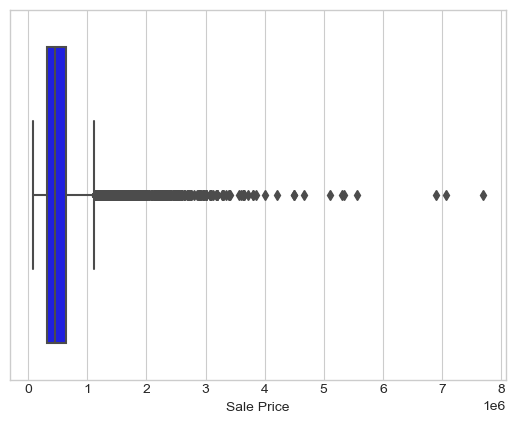

In [10]:
#plot of boxplot gives better understanding of outliers through the data
#we see outliers beyond the upper limit of boxplot on the right side of the graph

sns.boxplot(x= Data['Sale Price'], color='blue')

In [11]:
#we limit the outliers to the upper limit of boxplot, for this we calculate upper and lower limit of the quatiles 

q1=Data['Sale Price']. quantile(0.25)
q3=Data['Sale Price']. quantile(0.75)

#Range of quantiles (iqr)
iqr=q3-q1

In [12]:
upper_limit= q3+ 1.5*iqr
lower_limit= q1-1.5*iqr

In [13]:
#defining a finction to filter the data out of the range of upper and lower limit

def imputer_fun(value):
    if value > upper_limit:
        return upper_limit
    if value < lower_limit:
        return lower_limit
    else:
        return value

In [14]:
Data['Sale Price']= Data['Sale Price']. apply(imputer_fun)

In [15]:
# As here we see the max value of sale price changed to 1.129575e+06 instead of 7.700000e+06
Data['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

# Here can be applied the transformation on skewed data when arrive there

In [16]:
#delete the missing values from target variable (sale price)

Data.dropna(inplace=True, axis=0, subset=['Sale Price'])

In [17]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

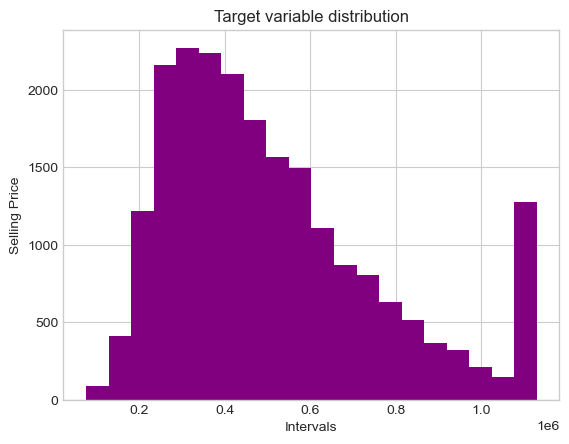

In [18]:
#take a look at target variable distribution
#Histogram is the best for the distribution check

plt.hist(Data['Sale Price'], bins=20, color='purple')
plt.xlabel('Intervals')
plt.ylabel('Selling Price')
plt.title('Target variable distribution')
plt.show()


In [19]:
#Save the cleaned data as Clean_Data_01
Data.to_csv('Clean_Data_01.csv', index=False)

In [65]:
#to handle missing values for independent variables: for continuous variables (mean or median) for object variables (mode)

In [20]:
Data_01= pd.read_csv('Clean_Data_01.csv')

In [21]:
Data_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [22]:
Numerical_Columns= ['No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'Area of the House from Basement (in Sqft)',
                  'Latitude', 'Longitude', 'Living Area after Renovation (in Sqft)']

In [23]:
#Attention!!! Here we can not use Data_01['Numerical_Columns'] as 
#_____this is a list of columns we can not use '' inside brackets

from sklearn.impute import SimpleImputer
Im= SimpleImputer(missing_values = np.nan, strategy='median')
Data_01[Numerical_Columns]=Im.fit_transform(Data_01[Numerical_Columns])

In [27]:
#To handle categorical variable missing data we follow the same stategy

column=Data_01['Zipcode'].values.reshape(-1,1)
Im= SimpleImputer(missing_values = np.nan, strategy='most_frequent')
Data_01['Zipcode']=Im.fit_transform(column)

In [28]:
#Again we save the cleaned data here and export them
Data_01.to_csv('Clean_Data_02.csv', index=False)

In [29]:
Data_02=pd.read_csv('Clean_Data_02.csv')

# Data transformation (convert categorical variables to numerical)

In [30]:
#Changing the type of zipcode data type
Data_02['Zipcode']=Data_02['Zipcode'].astype(object)

In [31]:
Data_02['No of Times Visited'].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [32]:
#Changing the times of visits with numerical values
mapping= {'None': '0', 'Once': '1', 'Twice':'2', 'Thrice':'3', 'Four':'4'}

Data_02['No of Times Visited']= Data_02['No of Times Visited'].map(mapping)


In [33]:
Data_02['No of Times Visited'].unique()

array(['0', '3', '4', '2', '1'], dtype=object)

In [34]:
#Renovated or no

Data_02['Ever Renovated']=np. where(Data_02['Renovated Year']== 0, 'NO', 'Yes')

In [35]:
#the year of sold house
Data_02['Sold Year']= pd.DatetimeIndex(Data_02['Date House was Sold']).year

In [36]:
# Years of renovation

Data_02['Years since Renovation']= np.where(Data_02['Ever Renovated']=='Yes',
                                          abs(Data_02['Sold Year']- Data_02['Renovated Year']),
                                           0)

In [37]:
#drop the columns that are not useful any more

Data_02.drop(columns=['Date House was Sold', 'Sold Year', 'Renovated Year'], inplace=True)

In [38]:
Data_02.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,NO,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,NO,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,NO,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,NO,0


In [39]:
Data_02.to_csv('Clean_Data_03.csv', index=False)

In [40]:
Data_03= pd.read_csv('Clean_Data_03.csv')

In [41]:
Data_03.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,NO,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,NO,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,NO,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,NO,0


In [42]:
Data_03['Sale Price'].corr(Data_03['Flat Area (in Sqft)'])

0.6951704258420672

In [43]:
np.corrcoef(Data_03['Sale Price'], Data_03['Age of House (in Years)'])

array([[ 1.        , -0.06430558],
       [-0.06430558,  1.        ]])

In [44]:
#relation between all the variables
Data_03.drop(columns=['ID']).corr()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years since Renovation
Sale Price,1.000000,0.339407,0.535124,0.695170,0.101319,0.298913,0.356114,0.680914,0.606527,0.307513,-0.064306,-0.043047,0.402430,0.045401,0.629944,0.092325,0.065907
No of Bedrooms,0.339407,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,-0.154113,-0.152760,-0.008708,0.129569,0.391771,0.029264,-0.007198
No of Bathrooms,0.535124,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,-0.505954,-0.203951,0.024570,0.223171,0.568568,0.087226,0.003551
Flat Area (in Sqft),0.695170,0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,-0.318146,-0.199380,0.052538,0.240091,0.756185,0.183223,0.023503
Lot Area (in Sqft),0.101319,0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,-0.053119,-0.129551,-0.085719,0.229449,0.144507,0.718527,0.013835
No of Floors,0.298913,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,-0.489244,-0.059222,0.049692,0.125620,0.280106,-0.011204,-0.000901
No of Times Visited,0.356114,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,0.053395,0.084830,0.006162,-0.078453,0.280452,0.072561,0.093546
Overall Grade,0.680914,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,-0.456711,-0.185844,0.111226,0.201736,0.681362,0.107581,-0.024388
Area of the House from Basement (in Sqft),0.606527,0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,-0.423848,-0.261124,-0.000819,0.343793,0.731996,0.194106,0.010491
Basement Area (in Sqft),0.307513,0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,0.133072,0.074933,0.110451,-0.144822,0.200302,0.017263,0.029158


In [45]:
Data_03.drop(columns='ID', inplace=True)

In [46]:
Data_03['Condition of the House'].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

<Axes: xlabel='Condition of the House'>

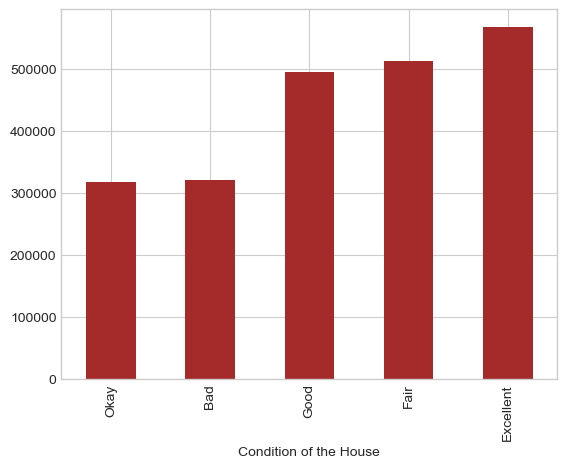

In [48]:
#visualization of the relation between target variable and categorical variable (condition of the house)
Data_03.groupby('Condition of the House')['Sale Price'].mean().sort_values(). plot(kind='bar', color='brown')

In [47]:
#Explore if the categorical variables have impact on the target variable
#Analysis of the variance to check if the mean of two or more groups are differnt or not

from statsmodels.formula.api import ols
import statsmodels.api as sm

In [49]:
Data_03.columns

Index(['Sale Price', 'No of Bedrooms', 'No of Bathrooms',
       'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'No of Floors',
       'Waterfront View', 'No of Times Visited', 'Condition of the House',
       'Overall Grade', 'Area of the House from Basement (in Sqft)',
       'Basement Area (in Sqft)', 'Age of House (in Years)', 'Zipcode',
       'Latitude', 'Longitude', 'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)', 'Ever Renovated',
       'Years since Renovation'],
      dtype='object')

In [52]:
Data_03= Data_03.rename(columns={'Sale Price': 'Sale_Price', 'Flat Area (in Sqft': 'Flat_Area(in Sqft)','Lot Area (in Sqft)': 'Lot_Area(in Sqft)',
                                 
                         'No of Floors': 'No_of_Floors', 'No of Times Visited': 'No_of_Times_Visited','Waterfront View': 'Waterfront_View',
                          'Condition of the House': 'Condition_of_the_House','Overall Grade':'Overall_Grade',   
                           'Area of the House from Basement (in Sqft)': 'Area_of_the_House_from_Basement_(in Sqft)','Age of House (in Years)':
                            'Age_of_House_(in Years)','Living Area after Renovation (in Sqft)': 'Living_Area_after_Renovation(in Sqft)',
                               'Lot Area after Renovation (in Sqft)': 'Lot_Area_after_Renovation(in Sqft)', 'Ever Renovated': 'Ever_Renovated',
                                 'Years since Renovation': 'Years_since_Renovation', 'No of Bedrooms': 'No_of_Bedrooms',
                                 'No of Bathrooms': 'No_of_Bathrooms','Flat Area (in Sqft)': 'Flat_Area(in Sqft)', 'Basement Area (in Sqft)':
                                 'Basement_Area(in Sqft)'
                                 })

In [53]:
Data_03.columns

Index(['Sale_Price', 'No_of_Bedrooms', 'No_of_Bathrooms', 'Flat_Area(in Sqft)',
       'Lot_Area(in Sqft)', 'No_of_Floors', 'Waterfront_View',
       'No_of_Times_Visited', 'Condition_of_the_House', 'Overall_Grade',
       'Area_of_the_House_from_Basement_(in Sqft)', 'Basement_Area(in Sqft)',
       'Age_of_House_(in Years)', 'Zipcode', 'Latitude', 'Longitude',
       'Living_Area_after_Renovation(in Sqft)',
       'Lot_Area_after_Renovation(in Sqft)', 'Ever_Renovated',
       'Years_since_Renovation'],
      dtype='object')

In [55]:
mod=ols('Sale_Price ~ Condition_of_the_House', data=Data_03).fit()

In [57]:
Anova_Table=sm.stats.anova_lm(mod, type=2)

In [ ]:
# Reject the null hypothesis means there is differences in mean values as F is a big value and PR< 0.05.

# These categorical varoable have impact on the tarhet variable (Sale_Price)
Anova_Table

# Craeting dummy variables( Changing categorical variables in numercal ones)

In [61]:
Data_03= pd. get_dummies(Data_03, columns=['Condition_of_the_House','Waterfront_View' , 'Ever_Renovated'], drop_first=True)

In [64]:
Data_03.head()

,Sale_Price,No_of_Bedrooms,No_of_Bathrooms,Flat_Area(in Sqft),Lot_Area(in Sqft),No_of_Floors,No_of_Times_Visited,Overall_Grade,Area_of_the_House_from_Basement_(in Sqft),Basement_Area(in Sqft),...,Longitude,Living_Area_after_Renovation(in Sqft),Lot_Area_after_Renovation(in Sqft),Years_since_Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Waterfront_View_Yes,Ever_Renovated_Yes
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,-122.257,1340.0,5650,0,0,1,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,-122.319,1690.0,7639,26,0,1,0,0,0,1
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,-122.233,2720.0,8062,0,0,1,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,-122.393,1360.0,5000,0,1,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,-122.045,1800.0,7503,0,0,1,0,0,0,0


# Binning
#When there are a lot of classes in each variable for example more than 20 we do binning before dummy variables
#binnig is used fopr both categorical and numerical variables

In [65]:
Zip_Table= Data_03.groupby('Zipcode'). agg({'Sale_Price': 'mean'}).sort_values('Sale_Price', ascending =True)

In [66]:
Zip_Table

,Sale_Price
Zipcode,
98002.0,2.342840e+05
98168.0,2.403284e+05
98032.0,2.512962e+05
98001.0,2.808047e+05
98148.0,2.849086e+05
...,...
98109.0,7.876028e+05
98112.0,8.807990e+05
98040.0,9.621087e+05


In [71]:
Zip_Table['Zipcode_Group']=pd.cut(Zip_Table['Sale_Price'], bins =10,
                                 labels=['Zipcode_Group0',
                                        'Zipcode_Group1',
                                         'Zipcode_Group2',
                                         'Zipcode_Group3',
                                         'Zipcode_Group4',
                                         'Zipcode_Group5',
                                         'Zipcode_Group6',
                                         'Zipcode_Group7',
                                         'Zipcode_Group8',
                                         'Zipcode_Group9'],
                                         include_lowest=True
                                        
                            )

In [72]:
Zip_Table= Zip_Table.drop(columns='Sale_Price')

In [76]:
Data_03= pd.merge(Data_03, 
                 Zip_Table,
                 left_on ='Zipcode',
                 how='left',
                 right_index=True)

In [77]:
Data_03=Data_03.drop(columns='Zipcode')

In [78]:
Data_03

,Sale_Price,No_of_Bedrooms,No_of_Bathrooms,Flat_Area(in Sqft),Lot_Area(in Sqft),No_of_Floors,No_of_Times_Visited,Overall_Grade,Area_of_the_House_from_Basement_(in Sqft),Basement_Area(in Sqft),...,Living_Area_after_Renovation(in Sqft),Lot_Area_after_Renovation(in Sqft),Years_since_Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Waterfront_View_Yes,Ever_Renovated_Yes,Zipcode_Group
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,1340.0,5650,0,0,1,0,0,0,0,Zipcode_Group0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,1690.0,7639,26,0,1,0,0,0,1,Zipcode_Group2
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,2720.0,8062,0,0,1,0,0,0,0,Zipcode_Group2
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,1360.0,5000,0,1,0,0,0,0,0,Zipcode_Group3
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,1800.0,7503,0,0,1,0,0,0,0,Zipcode_Group4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,360000.0,3,2.50,1530.0,1131.0,3.0,0,8,1530.0,0,...,1530.0,1509,0,0,1,0,0,0,0,Zipcode_Group3
21605,400000.0,4,2.50,2310.0,5813.0,2.0,0,8,2310.0,0,...,1830.0,7200,0,0,1,0,0,0,0,Zipcode_Group1
21606,402101.0,2,0.75,1020.0,1350.0,2.0,0,7,1020.0,0,...,1020.0,2007,0,0,1,0,0,0,0,Zipcode_Group3
21607,400000.0,3,2.50,1600.0,2388.0,2.0,0,8,1600.0,0,...,1410.0,1287,0,0,1,0,0,0,0,Zipcode_Group4


In [80]:
Data_03= pd.get_dummies(Data_03, columns=['Zipcode_Group'],drop_first=True)

In [81]:
Data_03.to_csv('Clean_Data_04.csv', index=False)

# Seperating test and train data

In [82]:
Data_04=pd.read_csv('Clean_Data_04.csv')

In [83]:
Y=Data_04.iloc[:,0]
X=Data_04.iloc[:, 1:31]

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# Feature Scaling

In [87]:
from sklearn import preprocessing
scale= preprocessing.StandardScaler()

In [88]:
X_train=scale.fit_transform(X_train)

In [90]:
X_test=scale.fit_transform(X_test)

In [91]:
Data_04.to_csv('Clean_Data_05.csv', index=False)

# Checking correlation and multicolinearity in independent variables

In [92]:
X.corr()

,No_of_Bedrooms,No_of_Bathrooms,Flat_Area(in Sqft),Lot_Area(in Sqft),No_of_Floors,No_of_Times_Visited,Overall_Grade,Area_of_the_House_from_Basement_(in Sqft),Basement_Area(in Sqft),Age_of_House_(in Years),...,Ever_Renovated_Yes,Zipcode_Group_Zipcode_Group1,Zipcode_Group_Zipcode_Group2,Zipcode_Group_Zipcode_Group3,Zipcode_Group_Zipcode_Group4,Zipcode_Group_Zipcode_Group5,Zipcode_Group_Zipcode_Group6,Zipcode_Group_Zipcode_Group7,Zipcode_Group_Zipcode_Group8,Zipcode_Group_Zipcode_Group9
No_of_Bedrooms,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,-0.154113,...,0.018573,-0.010603,-0.039342,-0.074129,0.024433,0.019420,0.090177,0.016725,0.102736,0.035694
No_of_Bathrooms,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,-0.505954,...,0.050282,-0.032810,-0.081460,-0.034459,0.084054,0.052804,0.123256,0.037746,0.110012,0.067871
Flat_Area(in Sqft),0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,-0.318146,...,0.055111,-0.058817,-0.063005,-0.078761,0.086139,0.075978,0.160045,0.051211,0.169576,0.090253
Lot_Area(in Sqft),0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,-0.053119,...,0.007736,0.023684,0.052103,-0.041112,-0.012050,0.015320,-0.023270,-0.027419,-0.007025,0.002671
No_of_Floors,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,-0.489244,...,0.006297,-0.003385,-0.067904,0.079211,0.071786,0.009203,0.069857,0.064981,-0.008633,0.005868
No_of_Times_Visited,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,0.053395,...,0.104051,-0.065000,0.004754,0.005905,0.003509,0.024801,0.068144,-0.012548,0.065335,0.012923
Overall_Grade,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,-0.456711,...,0.010010,-0.075495,-0.121379,-0.047869,0.151245,0.095613,0.200548,0.077126,0.156952,0.048638
Area_of_the_House_from_Basement_(in Sqft),0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,-0.423848,...,0.023202,-0.028348,-0.052418,-0.090628,0.086640,0.062267,0.129310,0.029477,0.134021,0.087398
Basement_Area(in Sqft),0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,0.133072,...,0.070969,-0.069149,-0.032302,0.006247,0.016422,0.040662,0.090206,0.051128,0.101159,0.023775
Age_of_House_(in Years),-0.154113,-0.505954,-0.318146,-0.053119,-0.489244,0.053395,-0.456711,-0.423848,0.133072,1.000000,...,0.225182,-0.070111,0.022094,0.095882,-0.056974,-0.009965,0.025718,0.101486,-0.002705,-0.002492


In [98]:
#Pair that have correlation > 0.5
k=X.corr()
z= [[str(i), str(j)]  for i in k.columns for j in k.columns if (k.loc[i,j] > abs(0.5))& (i!=j)]
#z, len(z)

# Calculation of VIF

In [107]:
#Import variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

#Calculating the vif shows which independt variables can be removed (> 5)
vif_data=X
VIF=pd.Series([variance_inflation_factor(vif_data. values, i) for i in range(vif_data.shape[1])], index= vif_data.columns)

VIF
                                                                  

No_of_Bedrooms                                   23.151025
No_of_Bathrooms                                  28.814318
Flat_Area(in Sqft)                             9082.024765
Lot_Area(in Sqft)                                 2.372363
No_of_Floors                                     18.024881
No_of_Times_Visited                               1.559620
Overall_Grade                                   140.408600
Area_of_the_House_from_Basement_(in Sqft)      6829.552868
Basement_Area(in Sqft)                          495.289062
Age_of_House_(in Years)                           8.211540
Latitude                                     272659.085671
Longitude                                    271581.076709
Living_Area_after_Renovation(in Sqft)            27.893476
Lot_Area_after_Renovation(in Sqft)                2.590360
Years_since_Renovation                            2.866211
Condition_of_the_House_Excellent                 58.086832
Condition_of_the_House_Fair                     473.2629

In [111]:
VIF[VIF== VIF.max()].index[0]

'Latitude'

In [112]:
def MC_remover(data):
    vif=pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index= data.columns)
    if vif.max() > 5:
        print(vif[vif==vif.max()].index[0], 'has been removed')
        data= data.drop(columns= [vif[vif==vif.max()].index[0]])
        return data
    else:
        print('No multicolinearity')
        return data

In [113]:
for i in range(15):
    vif_data= MC_remover(vif_data)
    
vif_data.head()    

Latitude has been removed
Flat_Area(in Sqft) has been removed
Longitude has been removed
Overall_Grade has been removed
Condition_of_the_House_Fair has been removed
No_of_Bathrooms has been removed
Living_Area_after_Renovation(in Sqft) has been removed
No_of_Bedrooms has been removed
No_of_Floors has been removed
No multicolinearity
No multicolinearity
No multicolinearity
No multicolinearity
No multicolinearity
No multicolinearity


,Lot_Area(in Sqft),No_of_Times_Visited,Area_of_the_House_from_Basement_(in Sqft),Basement_Area(in Sqft),Age_of_House_(in Years),Lot_Area_after_Renovation(in Sqft),Years_since_Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Good,Condition_of_the_House_Okay,...,Ever_Renovated_Yes,Zipcode_Group_Zipcode_Group1,Zipcode_Group_Zipcode_Group2,Zipcode_Group_Zipcode_Group3,Zipcode_Group_Zipcode_Group4,Zipcode_Group_Zipcode_Group5,Zipcode_Group_Zipcode_Group6,Zipcode_Group_Zipcode_Group7,Zipcode_Group_Zipcode_Group8,Zipcode_Group_Zipcode_Group9
0,5650.0,0,1180.0,0,63,5650,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7242.0,0,2170.0,400,67,7639,26,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2,10000.0,0,770.0,0,85,8062,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,5000.0,0,1050.0,910,53,5000,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,8080.0,0,1680.0,0,31,7503,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [116]:
vif=pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index= vif_data.columns)
vif, len(vif)   

(Lot_Area(in Sqft)                            2.359516
 No_of_Times_Visited                          1.451891
 Area_of_the_House_from_Basement_(in Sqft)    3.810652
 Basement_Area(in Sqft)                       1.631507
 Age_of_House_(in Years)                      3.629411
 Lot_Area_after_Renovation(in Sqft)           2.555051
 Years_since_Renovation                       2.851780
 Condition_of_the_House_Excellent             1.282969
 Condition_of_the_House_Good                  1.643404
 Condition_of_the_House_Okay                  1.029397
 Waterfront_View_Yes                          1.213205
 Ever_Renovated_Yes                           2.996671
 Zipcode_Group_Zipcode_Group1                 1.401692
 Zipcode_Group_Zipcode_Group2                 1.763574
 Zipcode_Group_Zipcode_Group3                 1.639474
 Zipcode_Group_Zipcode_Group4                 1.844062
 Zipcode_Group_Zipcode_Group5                 1.219950
 Zipcode_Group_Zipcode_Group6                 1.450277
 Zipcode_G

In [117]:
X=vif_data
y=Data_04['Sale_Price']

In [118]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)

In [120]:
x_train.shape , x_test.shape, y_train.shape, y_test.shape

((15126, 21), (6483, 21), (15126,), (6483,))

# Linear Regression

In [128]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

LR.fit(x_train, y_train)

LinearRegression()

In [130]:
LR.coef_

array([ 1.82019923e-01,  4.81084520e+04,  1.50754401e+02,  1.01698213e+02,
        5.53085112e+02, -2.15813077e-01, -2.65352228e+03,  4.02228859e+04,
        1.94189282e+03, -4.44602643e+04,  1.24777633e+05,  9.58418930e+04,
        5.65771019e+04,  1.20016103e+05,  2.38062032e+05,  2.64664748e+05,
        3.32107957e+05,  3.54613110e+05,  4.68550022e+05,  4.88593064e+05,
        5.08835352e+05])

In [131]:
prediction= LR.predict(x_test)

#score function calculate R2 values of the model 
LR.score(x_test, y_test)

0.8028659270443205

# verifying the assumption of linear regression
# Residuals

In [143]:
residuals= prediction -y_test

residual_table= pd.DataFrame({'residuals': residuals, 'prediction':prediction})

residual_table=residual_table.sort_values(by='prediction')

residual_table

,residuals,prediction
11503,-1.378717e+05,1.121283e+05
17392,-2.951656e+04,1.154834e+05
16373,-5.868006e+04,1.163199e+05
18057,-1.554774e+05,1.195226e+05
1147,4.606242e+04,1.210624e+05
...,...,...
21048,6.381785e+05,1.538178e+06
14554,5.843025e+05,1.713877e+06
1162,6.338616e+05,1.763437e+06
9252,1.010674e+06,2.140249e+06


In [145]:
z= [i for i in range(int(residual_table['prediction'].max()))]
l= [0 for i in range (int(residual_table['prediction'].max()))]

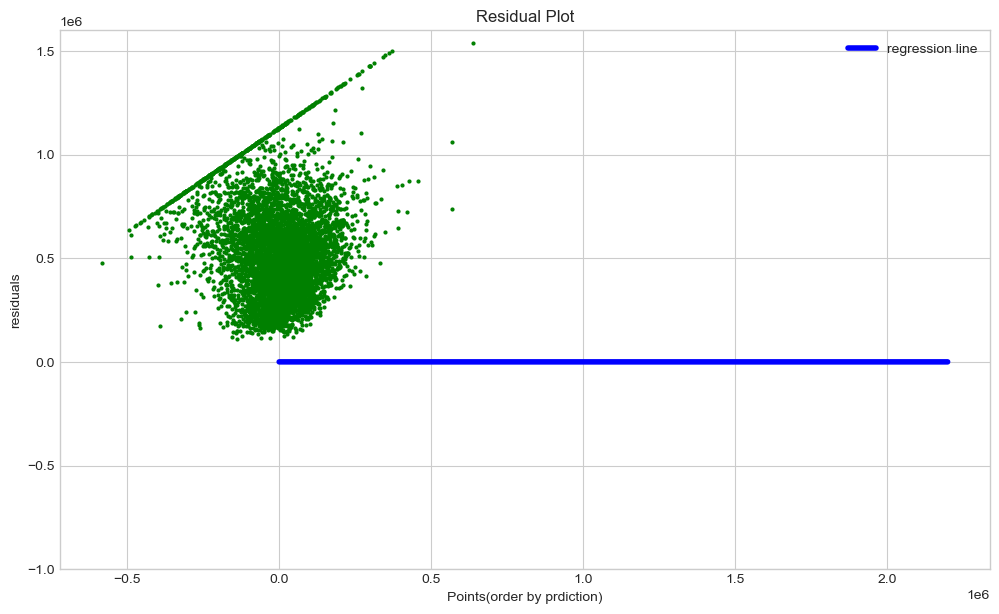

In [152]:
plt.figure(dpi=100, figsize=(12,7))

plt.scatter(residual_table['residuals'], residual_table['prediction'], color='green', s=4)
plt.plot(z, l, color='blue' , linewidth= 4, label='regression line')
plt.ylim(-1000000,1600000)
plt.xlabel('Points(order by prdiction)')
plt.ylabel('residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()

# distribution of errors

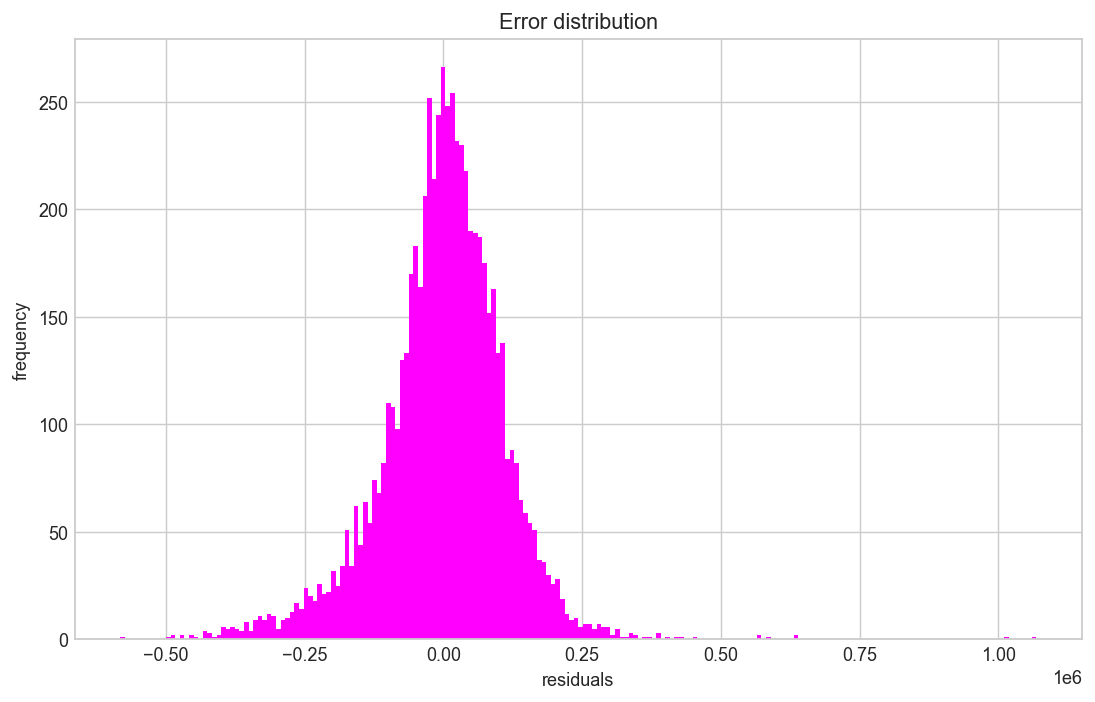

In [154]:
plt.figure(dpi=130, figsize=(10,6))

plt.hist(residual_table['residuals'], color='magenta', bins= 200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('Error distribution')
plt.show()

# Model coeffiecient (interpretation)

In [157]:
coefficient_table= pd.DataFrame({'column': x_train.columns,
                                'coefficients':LR.coef_})

coefficient_table= coefficient_table.sort_values( by ='coefficients')

coefficient_table

,column,coefficients
9,Condition_of_the_House_Okay,-44460.264330
6,Years_since_Renovation,-2653.522282
5,Lot_Area_after_Renovation(in Sqft),-0.215813
0,Lot_Area(in Sqft),0.182020
3,Basement_Area(in Sqft),101.698213
2,Area_of_the_House_from_Basement_(in Sqft),150.754401
4,Age_of_House_(in Years),553.085112
8,Condition_of_the_House_Good,1941.892819
7,Condition_of_the_House_Excellent,40222.885925
1,No_of_Times_Visited,48108.451982


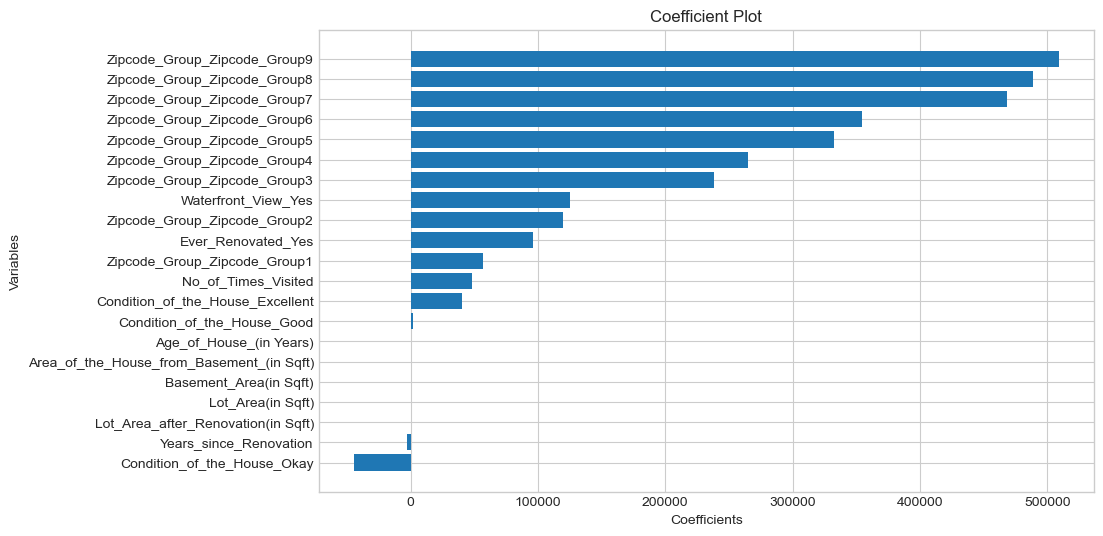

In [160]:
plt.figure(dpi=100, figsize=(10,6))

x=coefficient_table['column']
y=coefficient_table['coefficients']
plt.barh(x,y)
plt.xlabel('Coefficients')
plt.ylabel('Variables')
plt.title('Coefficient Plot')
plt.show()